**Classification Analysis Project - Machine Learning With R - Jiri Bartl**

**Introduction**

In an effort to diversify its revenue stream and enhance customer experience, meal delivery service Apprentice Chef has launched a unique cross-selling promotion called "Halfway There" where subscribers receive a half bottle of wine from a local California vineyard every Wednesday. This initiative aims to create a competitive advantage by offering hard-to-find local wines from smaller vineyards. The company wants to understand which customers are likely to subscribe to this new service.

We have been given a data set with approximately 2,000 customers who have been exclusively offered the "Halfway There" promotion. The goal is to come up with meaningful insights, and build a machine learning model to predict which customers will subscribe to the "Halfway There" service.

This assignment is structured in several segments, following logical steps from initial data processing, exploratory data analysis, feature engineering, model experiments, and final model selection.

In [97]:
# installing new libraries
#install.packages("rpart")
#install.packages("pROC")
#install.packages("readxl")
#install.packages("glue")
#install.packages("ggplot2")
#install.packages("magrittr")
#install.packages("dplyr")
#install.packages("DT")
#install.packages("moments")
#install.packages("repr")
#install.packages("caret")
#install.packages("corrplot")
#install.packages("psych")
#install.packages("rpart.plot") #collab wants the .plot to be installed separately and not part of the "rpart"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

In [98]:
# importing libraries
library(readxl)   # for reading Excel files
library(glue)     # dynamic printing
library(ggplot2)  # for graphical output
library(magrittr) # piping
library(dplyr)    # for data manipulation
library(DT)       # data tables
library(corrplot) # correlation plots
library(psych)    # statistics
library(moments)  #for skeweness
library(repr)     # plot dimensions
library(caret)    # essential modeling tools (new)
library(rpart)        # (New!) decision trees
library(rpart.plot)   # (New!) decision tree visualizations
library(pROC)     # roc curve

# setting options for better display
options(max.print = 500)
options(width = 1000)
options(scipen = 999, digits = 5)
options(repr.plot.width = 10, repr.plot.height = 8)


# making sure results can be replicated
set.seed(702)


# specifying file name
file <- '../data/Apprentice_Chef_Dataset.xlsx'


# reading the file into R
chef <- read_excel(file) %>%
           select(-customer_id) #customer_id doesn't have any value



# checking dataset features
names(chef)

[1] "REVENUE"                      "CROSS_SELL_SUCCESS"           "EMAIL_DOMAIN"                 "TOTAL_MEALS_ORDERED"          "UNIQUE_MEALS_PURCH"           "CONTACTS_W_CUSTOMER_SERVICE"  "PRODUCT_CATEGORIES_VIEWED"    "AVG_TIME_PER_SITE_VISIT"      "MOBILE_NUMBER"                "CANCELLATIONS_BEFORE_NOON"    "CANCELLATIONS_AFTER_NOON"     "TASTES_AND_PREFERENCES"       "MOBILE_LOGINS"                "PC_LOGINS"                    "WEEKLY_PLAN"                  "EARLY_DELIVERIES"             "LATE_DELIVERIES"              "PACKAGE_LOCKER"               "REFRIGERATED_LOCKER"          "FOLLOWED_RECOMMENDATIONS_PCT" "AVG_PREP_VID_TIME"            "LARGEST_ORDER_SIZE"           "MASTER_CLASSES_ATTENDED"      "MEDIAN_MEAL_RATING"           "AVG_CLICKS_PER_VISIT"         "TOTAL_PHOTOS_VIEWED"

In [99]:
# outputting the first ten rows of the dataset
head(x = chef, n = 10)

REVENUE,CROSS_SELL_SUCCESS,EMAIL_DOMAIN,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,⋯,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1880.0,1,passport.com,118,4,7,5,86.00,1,2,⋯,2,1,0,90,165.8,6,1,3,11,0
1495.0,1,jnj.com,44,3,6,3,125.60,1,0,⋯,4,1,0,90,150.5,4,1,3,13,90
2572.5,1,gmail.com,38,1,5,3,58.00,1,5,⋯,0,0,0,80,99.6,3,0,3,12,0
1647.0,1,ibm.com,76,3,8,10,45.51,0,3,⋯,4,0,0,90,125.0,3,0,3,13,0
1923.0,1,goldmansacs.com,65,3,6,9,106.00,1,1,⋯,4,1,0,90,135.3,3,1,3,13,253
1250.0,1,gmail.com,57,4,6,2,84.21,1,0,⋯,5,0,0,70,91.2,3,1,2,17,0
4665.0,1,homedepot.com,106,3,10,8,110.00,1,3,⋯,3,0,0,70,263.3,6,2,4,10,705
1690.0,1,yahoo.com,122,6,8,10,92.73,1,1,⋯,3,0,0,70,160.0,5,1,3,13,0
1710.0,1,caterpillar.com,46,4,5,10,170.47,1,0,⋯,10,1,1,70,170.1,4,2,3,12,0


The dataset for the Halfway There promotion includes a variables related to customer behavior, their spending and interactions with the company. Key columns like total revenue and whether a customer subscribed to the promotion stand out. We also have data on customer service contacts, order habits, site engagement and personal preferences. The email domains give a peek into different customer types.

For the analysis, I will look at how these features relate to whether customers subscribed. I will try to segment customers to see if certain groups are more likely to sign up. I will also try to  create new features to get better insights. This should help us to understand customer behavior better and boost the promotion’s success.

In [127]:
str(chef)

tibble [1,946 × 29] (S3: tbl_df/tbl/data.frame)
 $ REVENUE                     : num [1:1946] 1880 1495 2572 1647 1923 ...
 $ CROSS_SELL_SUCCESS          : num [1:1946] 1 1 1 1 1 1 1 1 1 1 ...
 $ EMAIL_DOMAIN                : chr [1:1946] "passport.com" "jnj.com" "gmail.com" "ibm.com" ...
 $ TOTAL_MEALS_ORDERED         : num [1:1946] 118 44 38 76 65 57 106 122 46 58 ...
 $ UNIQUE_MEALS_PURCH          : num [1:1946] 4 3 1 3 3 4 3 6 4 4 ...
 $ CONTACTS_W_CUSTOMER_SERVICE : num [1:1946] 7 6 5 8 6 6 10 8 5 6 ...
 $ PRODUCT_CATEGORIES_VIEWED   : num [1:1946] 5 3 3 10 9 2 8 10 10 5 ...
 $ AVG_TIME_PER_SITE_VISIT     : num [1:1946] 86 125.6 58 45.5 106 ...
 $ MOBILE_NUMBER               : num [1:1946] 1 1 1 0 1 1 1 1 1 1 ...
 $ CANCELLATIONS_BEFORE_NOON   : num [1:1946] 2 0 5 3 1 0 3 1 0 0 ...
 $ CANCELLATIONS_AFTER_NOON    : num [1:1946] 1 1 0 0 1 0 0 0 0 1 ...
 $ TASTES_AND_PREFERENCES      : num [1:1946] 0 0 1 1 0 1 0 1 1 1 ...
 $ MOBILE_LOGINS               : num [1:1946] 6 6 6 6 6 5 6 5 

In [130]:
# creating a correlation matrix
chef_corr = chef %>%

   select(-EMAIL_DOMAIN) %>%

    # (linear) correlation matrix
    cor(x      = .,
        method = "pearson") %>%

    # rounding to two decimal places
    round(x = ., digits = 2)


# making housing_corr interactive
datatable(data    = chef_corr,
          options = list(pageLength = ncol(chef_corr),
                         autoWidth  = TRUE))

ERROR: Error in cor(x = ., method = "pearson"): 'x' must be numeric


I got stuck here a bit on the correlation matrix. For some reason I either get error that x is not numeric or no result at ll. I've used str(chef) to see what are the data types and the only string is DOMAIN_NAME..and obviously as I play with the data code sometime the feature EMAIL_DOMAIN_GROUP gets created. Either way I'm unable to do the correlation which is important so I can see the correlation between CROSS_SELL_SUCCESS and other variables

In [101]:
# New feature to set a flag if there was a recommendation for the customer
chef$HAS_RECOMMENDATION_PCT <- ifelse(chef$FOLLOWED_RECOMMENDATIONS_PCT > 0, 1, 0)

# Vie the instances of 0 and 1
table(chef$has_Recommendation_PCT)

Warning message:
“Unknown or uninitialised column: `has_Recommendation_PCT`.”


< table of extent 0 >

In [102]:
# New feature to segment the email / yes, same feature as in the previous assignment. It has to be useful somewhere :)

# Define email domain groups
PROFESSIONAL_DOMAINS <- c("mmm.com", "amex.com", "apple.com", "boeing.com", "caterpillar.com", "chevron.com", "cisco.com", "cocacola.com", "disney.com", "dupont.com", "exxon.com", "ge.org", "goldmansacs.com", "homedepot.com", "ibm.com", "intel.com", "jnj.com", "jpmorgan.com", "mcdonalds.com", "merck.com", "microsoft.com", "nike.com", "pfizer.com", "pg.com", "travelers.com", "unitedtech.com", "unitedhealth.com", "verizon.com", "visa.com", "walmart.com")
PERSONAL_DOMAINS <- c("gmail.com", "yahoo.com", "protonmail.com")
JUNK_DOMAINS <- c("me.com", "aol.com", "hotmail.com", "live.com", "msn.com", "passport.com")

######################REFERENCES#############################
# OpenAI. (2024). ChatGPT (Jul 21 version) [Large language model]. https://chat.openai.com/chat

#PROMT
#you are R developer. I have a data set called 'chef' with column EMAIL_DOMAIN. I want to create a new features called 'EMAIL_DOMAIN_GROUP' and assign values based on the email domain. I've defined the groups as below. Please assign values in EMAIL_DOMAIN_GROUP based on the following rules
#professional_domains -> professional
#personal_domains -> person
#junk_domains -> junk

#PROFESSIONAL_DOMAINS <- c("mmm.com", "amex.com", "apple.com", "boeing.com", "caterpillar.com", "chevron.com", "cisco.com", "cocacola.com", "disney.com", "dupont.com", "exxon.com", "ge.org", "goldmansacs.com", "homedepot.com", "ibm.com", "intel.com", "jnj.com", "jpmorgan.com", "mcdonalds.com", "merck.com", "microsoft.com", "nike.com", "pfizer.com", "pg.com", "travelers.com", "unitedtech.com", "unitedhealth.com", "verizon.com", "visa.com", "walmart.com")
#PERSONAL_DOMAINS <- c("gmail.com", "yahoo.com", "protonmail.com")
#JUNK_DOMAINS <- c("me.com", "aol.com", "hotmail.com", "live.com", "msn.com", "passport.com")


#Please write the code to create the custom feature and assign values based on the domain groups ->
###################



# Create the EMAIL_DOMAIN_GROUP feature using mutate
chef <- chef %>%
  mutate(EMAIL_DOMAIN_GROUP = case_when(
    EMAIL_DOMAIN %in% PROFESSIONAL_DOMAINS ~ "professional",
    EMAIL_DOMAIN %in% PERSONAL_DOMAINS ~ "personal",
    EMAIL_DOMAIN %in% JUNK_DOMAINS ~ "junk",
    TRUE ~ "other"
  ))

# View the updated dataset
head(chef)


REVENUE,CROSS_SELL_SUCCESS,EMAIL_DOMAIN,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,⋯,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,HAS_RECOMMENDATION_PCT,EMAIL_DOMAIN_GROUP
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1880.0,1,passport.com,118,4,7,5,86.00,1,2,⋯,0,90,165.8,6,1,3,11,0,1,junk
1495.0,1,jnj.com,44,3,6,3,125.60,1,0,⋯,0,90,150.5,4,1,3,13,90,1,professional
2572.5,1,gmail.com,38,1,5,3,58.00,1,5,⋯,0,80,99.6,3,0,3,12,0,1,personal
1647.0,1,ibm.com,76,3,8,10,45.51,0,3,⋯,0,90,125.0,3,0,3,13,0,1,professional
1923.0,1,goldmansacs.com,65,3,6,9,106.00,1,1,⋯,0,90,135.3,3,1,3,13,253,1,professional
1250.0,1,gmail.com,57,4,6,2,84.21,1,0,⋯,0,70,91.2,3,1,2,17,0,1,personal


In [103]:
# New feature to calculate late delivery ratio, I think it would make more sense to do it for order but don't have the order number per customer
chef$LATE_DELIVERY_RATIO <- chef$LATE_DELIVERIES / chef$TOTAL_MEALS_ORDERED

# View the updated dataset
head(chef)

REVENUE,CROSS_SELL_SUCCESS,EMAIL_DOMAIN,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,⋯,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,HAS_RECOMMENDATION_PCT,EMAIL_DOMAIN_GROUP,LATE_DELIVERY_RATIO
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1880.0,1,passport.com,118,4,7,5,86.00,1,2,⋯,90,165.8,6,1,3,11,0,1,junk,0.016949
1495.0,1,jnj.com,44,3,6,3,125.60,1,0,⋯,90,150.5,4,1,3,13,90,1,professional,0.090909
2572.5,1,gmail.com,38,1,5,3,58.00,1,5,⋯,80,99.6,3,0,3,12,0,1,personal,0.000000
1647.0,1,ibm.com,76,3,8,10,45.51,0,3,⋯,90,125.0,3,0,3,13,0,1,professional,0.052632
1923.0,1,goldmansacs.com,65,3,6,9,106.00,1,1,⋯,90,135.3,3,1,3,13,253,1,professional,0.061538
1250.0,1,gmail.com,57,4,6,2,84.21,1,0,⋯,70,91.2,3,1,2,17,0,1,personal,0.087719


In [104]:
## setting up models ##

# all x-features
x_all      <- chef %>%

    # excluding y-variable
    select(-CROSS_SELL_SUCCESS)


# original x-features
x_original <- chef %>%

    # all original features
    select(REVENUE : TOTAL_PHOTOS_VIEWED)

In [105]:
# choosing x-features
x_data <- x_all

In [106]:
# setting up standardization
scaler <- preProcess(x      = x_data,
                     method = c("scale", "center")) # scaling and centering


# applying standardization
x_scaled <- predict(object  = scaler,
                    newdata = x_data)

In [107]:
# choosing and attaching y-variable
model_data <- cbind(x_scaled,
                    Y = chef$CROSS_SELL_SUCCESS) # selecting y-variable

In [108]:
# creating a train-test split
train_index <- createDataPartition(y = model_data$Y, # y-variable
                                   p    = 0.75,      # training set proportion
                                   list = FALSE)     # returning a DataFrame


# creating training and testing sets
train_data <- model_data[ train_index, ]
test_data  <- model_data[-train_index, ]

**CART Model**

In [109]:
# building a model
model <- rpart(formula = Y ~ .     ,
               data    = train_data,
               method  = "class")    # classification tree


# checking model summary
summary(model)

Call:
rpart(formula = Y ~ ., data = train_data, method = "class")
  n= 1460 

        CP nsplit rel error  xerror     xstd
1 0.160600      0   1.00000 1.00000 0.038163
2 0.119914      1   0.83940 0.87366 0.036715
3 0.067452      2   0.71949 0.79443 0.035621
4 0.023555      4   0.58458 0.64668 0.033141
5 0.012848      5   0.56103 0.67238 0.033617
6 0.010707      7   0.53533 0.67024 0.033578
7 0.010000      8   0.52463 0.67238 0.033617

Variable importance
FOLLOWED_RECOMMENDATIONS_PCT                 EMAIL_DOMAIN           EMAIL_DOMAIN_GROUP    CANCELLATIONS_BEFORE_NOON       HAS_RECOMMENDATION_PCT          LATE_DELIVERY_RATIO          TOTAL_MEALS_ORDERED            AVG_PREP_VID_TIME           MEDIAN_MEAL_RATING 
                          62                           18                            8                            4                            3                            2                            1                            1                            1 

Node number 1: 1

In analyzing the CART model, we found that FOLLOWED_RECOMMENDATIONS_PCT is the most crucial factor in predicting whether customers will subscribe to the “Halfway There” promotion, accounting for 62% of the importance. The next key factors are EMAIL_DOMAIN (18%) and EMAIL_DOMAIN_GROUP (8%). I'm not sure if I should leave the domain group in in this case but I will just go with it. The model starts by splitting on how often customers follow recommendations with those who do being more likely to subscribe. Next splits involve email domains and cancellations before noon. For instance, at one point the model accurately predicted 601 out of 601 customers to subscribe based on these splits. The overall performance indicates that our model is quite effective in identifying potential subscribers. The decision tree’s simple, step-by-step splits help us understand which customer behaviors and characteristics matter most for the promotion.

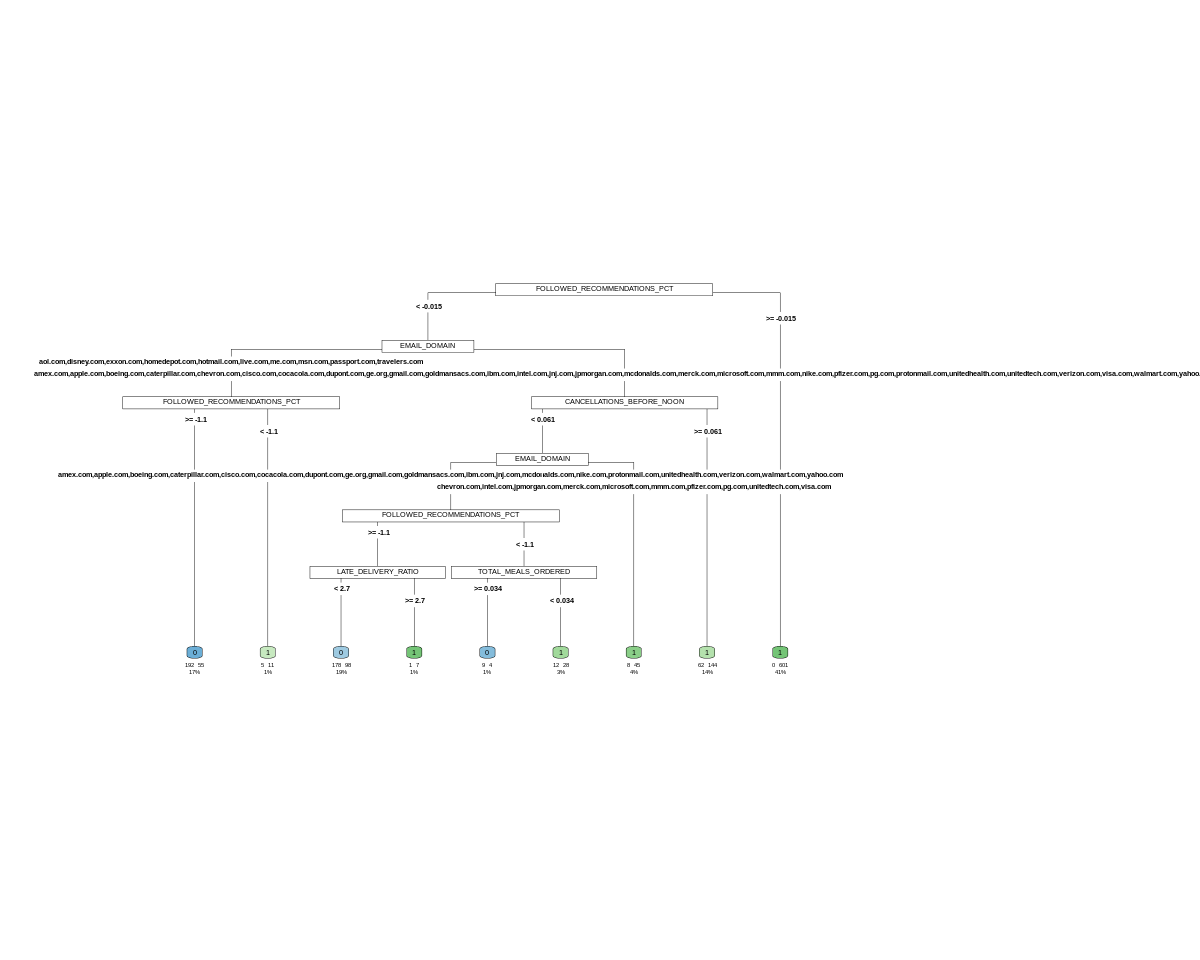

In [110]:
# visualizing the decision tree
rpart.plot(x             = model, # decision tree
           type          = 5,     # tree format
           extra         = 101,   # adding percentages
           under         = TRUE,  # text under nodes
           fallen.leaves = TRUE)  # better node positioning

As decribed already above. This is a visual representation of the decision tree. The decision tree shows that the most important factor for predicting subscriptions is how often customers follow recommendations. If they don’t follow recommendations much, the next important factor is their email domain. If they do follow recommendations more, cancellations before noon become significant. Each split in the tree helps us understand the customer’s behavior better leading to accurate predictions of who will subscribe to the promotion.

In [111]:
# predicting on new data
train_predictions <- predict(object  = model,
                             newdata = train_data,
                             type    = "prob")[,2]


test_predictions  <- predict(object  = model,
                             newdata = test_data,
                             type    = "prob")[,2]


# calculating ROC
model_train_roc <- roc(train_data$Y, train_predictions)
model_test_roc  <- roc(test_data $Y, test_predictions)


# calculating AUC
model_train_score <- auc(model_train_roc)
model_test_score  <- auc(model_test_roc)


# calculating train-test gap
model_gap = abs(model_train_score - model_test_score)


# checking results
cat('Training Score :', round(model_train_score, 4), "\n")
cat('Testing Score  :', round(model_test_score, 4), "\n")
cat('Train-Test Gap :', round(model_gap, 4), "\n")

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training Score : 0.8967 
Testing Score  : 0.847 
Train-Test Gap : 0.0497 


The CART model’s score for the training data is 0.8967, indicating excellent performance in distinguishing between subscribers and non-subscribers. For the testing data the score is slightly lower at 0.847 which still reflecting great performance. The train-test gap is 0.0497 suggesting that the model generalizes well to new data without overfitting. This means the model is reliable. We discussed in class that a 5% train-test gap is great and this is right under this figure. The CART model identified the key factors influencing customer subscriptions to the promotion and according our discussion that model performance around 85% as the best this can be a good candidate. Lets do further analysis

In [112]:
# feature importance
importance <- varImp(object = model) %>%
              round(x = ., digits = 2)


# checking results
importance

,Overall
,<dbl>
AVG_PREP_VID_TIME,2.21
AVG_TIME_PER_SITE_VISIT,10.70
CANCELLATIONS_BEFORE_NOON,61.01
EMAIL_DOMAIN,117.53
EMAIL_DOMAIN_GROUP,89.93
FOLLOWED_RECOMMENDATIONS_PCT,253.36
HAS_RECOMMENDATION_PCT,44.34
LATE_DELIVERIES,2.14
LATE_DELIVERY_RATIO,8.51


**TREE MODEL**

In [114]:
# building a model
model <- rpart(formula = Y ~ .,
               data    = train_data,
               method  = "class",
               control = c(minbucket = 100, # min obs per terminal node
                           maxdepth  = 4)   # how big the tree can grow
               )


# checking model summary
summary(model)

Call:
rpart(formula = Y ~ ., data = train_data, method = "class", control = c(minbucket = 100, 
    maxdepth = 4))
  n= 1460 

        CP nsplit rel error  xerror     xstd
1 0.160600      0   1.00000 1.00000 0.038163
2 0.119914      1   0.83940 0.85867 0.036520
3 0.062099      2   0.71949 0.78801 0.035526
4 0.010000      4   0.59529 0.67880 0.033733

Variable importance
FOLLOWED_RECOMMENDATIONS_PCT                 EMAIL_DOMAIN           EMAIL_DOMAIN_GROUP    CANCELLATIONS_BEFORE_NOON          LATE_DELIVERY_RATIO 
                          66                           17                           10                            5                            1 

Node number 1: 1460 observations,    complexity param=0.1606
  predicted class=1  expected loss=0.31986  P(node) =1
    class counts:   467   993
   probabilities: 0.320 0.680 
  left son=2 (859 obs) right son=3 (601 obs)
  Primary splits:
      FOLLOWED_RECOMMENDATIONS_PCT < -0.015468 to the left,  improve=209.0200, (0 missing)
   

The decision tree model shows us that FOLLOWED_RECOMMENDATIONS_PCT is the most critical factor in predicting subscriptions to the promotion with an importance score of 66%. Other important factors include EMAIL_DOMAIN (17%) and CANCELLATIONS_BEFORE_NOON (5%). The model’s cross-validated error decreased from 1 to 0.678, indicating strong performance. The root node correctly classifies 68% of subscribers and the first split on FOLLOWED_RECOMMENDATIONS_PCT improves the model’s accuracy

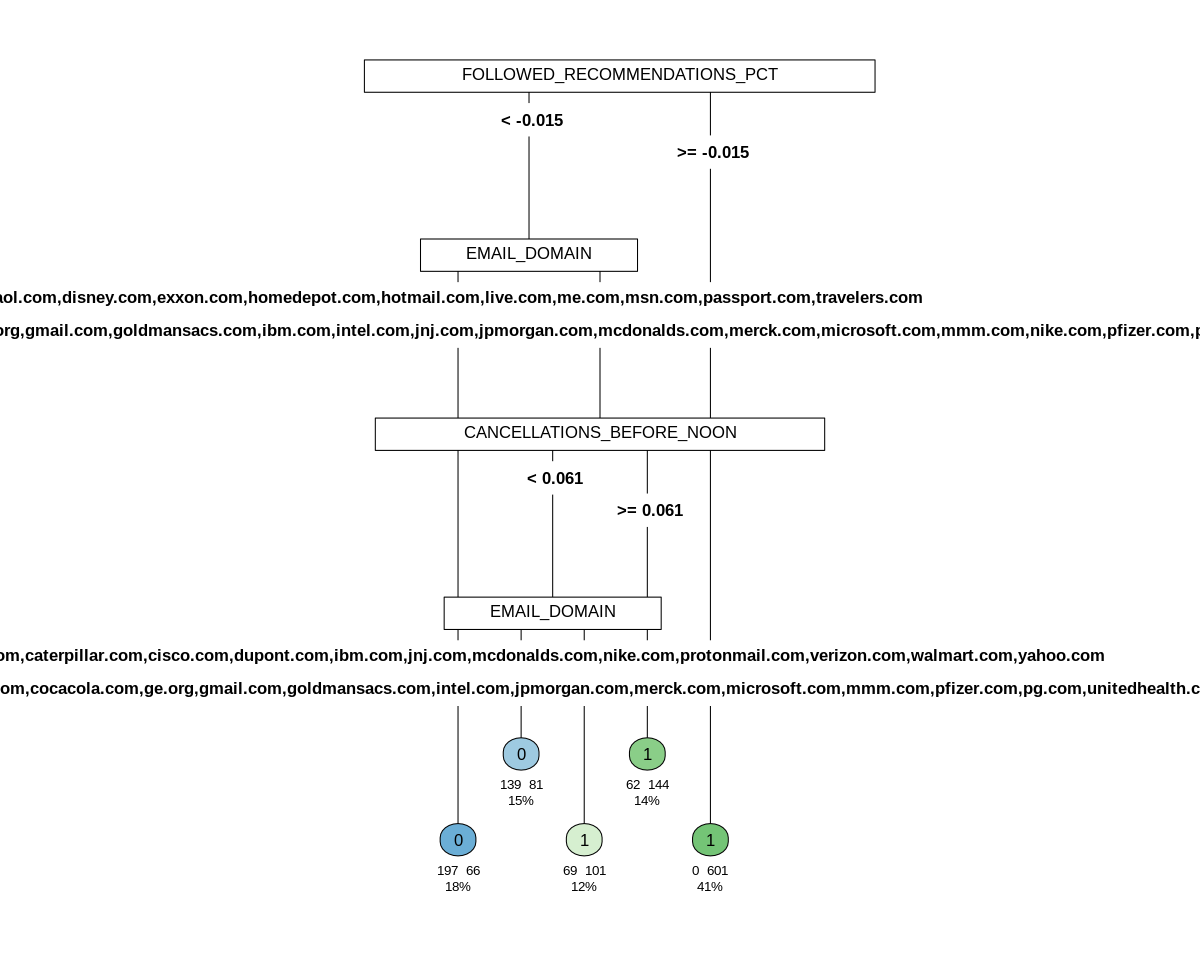

In [115]:
# visualizing the decision tree
rpart.plot(x             = model, # decision tree
           type          = 5,     # tree format
           extra         = 101,   # adding percentages
           under         = TRUE,  # text under nodes
           fallen.leaves = TRUE)  # better node positioning

The decision tree visualization shows that FOLLOWED_RECOMMENDATIONS_PCT is the most crucial factor in predicting subscriptions to the promotion. The tree starts with a primary split based on whether the FOLLOWED_RECOMMENDATIONS_PCT is less than -0.015. For customers who follow recommendations less frequently, the model further splits based on EMAIL_DOMAIN highlighting the importance of the email domain in these cases. For those who follow recommendations more frequently the next split is based on CANCELLATIONS_BEFORE_NOON that indicates that cancellation behavior before noon is a significant predictor. The leaf nodes at the bottom of the tree provide the final predictions with some nodes showing a 100% probability of customers subscribing.

In [116]:
# predicting on new data
train_predictions <- predict(object  = model,
                             newdata = train_data,
                             type    = "prob")[,2]


test_predictions  <- predict(object  = model,
                             newdata = test_data,
                             type    = "prob")[,2]


# calculating ROC
model_train_roc <- roc(train_data$Y, train_predictions)
model_test_roc  <- roc(test_data $Y, test_predictions)


# calculating AUC
model_train_score <- auc(model_train_roc)
model_test_score  <- auc(model_test_roc)


# calculating train-test gap
model_gap = abs(model_train_score - model_test_score)


# checking results
cat('Training Score :', round(model_train_score, 4), "\n")
cat('Testing Score  :', round(model_test_score, 4), "\n")
cat('Train-Test Gap :', round(model_gap, 4), "\n")

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Training Score : 0.8819 
Testing Score  : 0.8319 
Train-Test Gap : 0.05 


The decision tree model performs also well with an score of 0.8819 on the training data and 0.8319 on the testing data. The train-test gap is 0.05, which is within the acceptable range discussed in class indicating that the model generalizes well to new data without overfitting. These high scores show that the model is effective in distinguishing between subscribers and non-subscribers.

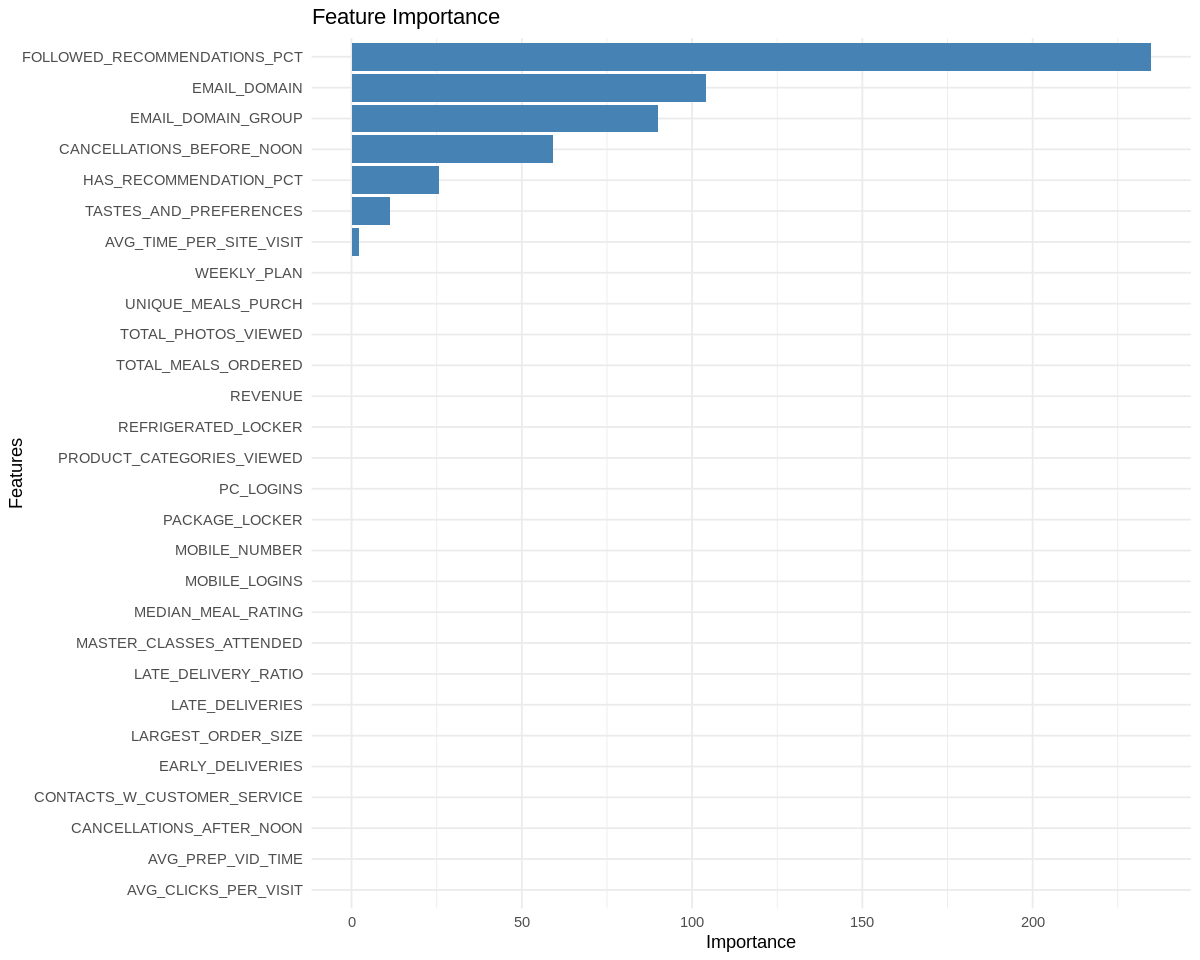

In [117]:
# feature importance
importance <- varImp(object = model) %>%
              round(x = ., digits = 2)


# configuring row names
importance$Feature   <- rownames(importance)


# configuring column names
colnames(importance) <- c("Importance", "Feature")


# setting plot space
ggplot(importance,
       aes(x = reorder(Feature,
                       Importance),
           y = Importance)) +


# adding a layer (barplot)
geom_bar(stat = "identity",
         fill = "steelblue") +


# orienting horizonally (instead of vertically)
coord_flip() +


# title and labels
labs(title = "Feature Importance",
     x     = "Features",
     y     = "Importance") +


# minimizing theme
theme_minimal()

The feature importance plot highlights that FOLLOWED_RECOMMENDATIONS_PCT is the most significant factor in predicting subscriptions followed by EMAIL_DOMAIN, EMAIL_DOMAIN_GROUP, and CANCELLATIONS_BEFORE_NOON. Customers who frequently follow recommendations and have certain email domains are more likely to subscribe.
Some features like REVENUE have no importance because they either lack a direct correlation with subscription behavior which is strange. This could be also caused by the data but I will just trust the model

**LOGISTIC REGRESSION**

In [131]:
# selecting x-data
x_data <- chef %>%
          select(-CROSS_SELL_SUCCESS)

In [132]:
# setting up standardization
scaler <- preProcess(x      = x_data,
                     method = c("scale", "center")) # scaling and centering


# applying standardization
x_scaled <- predict(object  = scaler,
                    newdata = x_data)


# choosing and attaching y-variable
model_data <- cbind(x_scaled,
                    Y = chef$CROSS_SELL_SUCCESS) # naming and selecting y-variable

In [133]:
# creating a train-test split
train_index <- createDataPartition(y = model_data$Y, # y-variable
                                   p    = 0.75,      # training set proportion
                                   list = FALSE)     # returning a DataFrame


# creating training and testing sets
train_data <- model_data[ train_index, ]
test_data  <- model_data[-train_index, ]

In [134]:
# instantiating a logistic regression model
logistic_small <- glm(formula = Y ~ FOLLOWED_RECOMMENDATIONS_PCT,#strongest variable
                      data    = train_data,
                      family  = binomial)


# checking results
summary(logistic_small)


Call:
glm(formula = Y ~ FOLLOWED_RECOMMENDATIONS_PCT, family = binomial, 
    data = train_data)

Coefficients:
                             Estimate Std. Error z value            Pr(>|z|)    
(Intercept)                    1.1379     0.0787    14.5 <0.0000000000000002 ***
FOLLOWED_RECOMMENDATIONS_PCT   1.4193     0.0940    15.1 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1825.6  on 1459  degrees of freedom
Residual deviance: 1457.3  on 1458  degrees of freedom
AIC: 1461

Number of Fisher Scoring iterations: 5


The logistic regression model confirms that FOLLOWED_RECOMMENDATIONS_PCT is a highly significant predictor of whether customers will subscribe to the promotion. The positive coefficient for FOLLOWED_RECOMMENDATIONS_PCT is 1.4193, with a p-value of less than 0.0000000000000002 which indicates strong statistical significance. This suggests that as the percentage of recommendations followed increases, the likelihood of a customer subscribing also increases.

In [135]:
# predicting on the test set
logreg_pred <- predict(object  = logistic_small,
                       newdata = test_data,
                       type    = "response")


# checking results
logreg_pred                  %>%
    round(x = ., digits = 4) %>%
    as.data.frame(.)         %>%
    head(x = ., n = 10)

,.
,<dbl>
3,0.9712
4,0.9829
5,0.9829
12,0.9712
14,0.9829
18,0.9829
22,0.9829
25,0.9829
35,0.9519


The first column in the prediction output represents the row indices from the original test dataset and indicates which specific data points the model’s predicted probabilities refer to in the original data set. The second column contains the probabilities that customers will subscribe to the promotion. The customer in row 3 has a 97.12% chance of subscribing. This detailed prediction information helps in identifying and targeting potential subscribers effectively and confirms the strong predictive power of the FOLLOWED_RECOMMENDATIONS_PCT feature

In [136]:
# converting results into 1s subscribe and 0s did not subscribe
logreg_pred_class <- ifelse(test = logreg_pred > 0.5,
                            yes  = 1,
                            no   = 0)


# checking results
table('Subscription Predictions' = logreg_pred_class)

Subscription Predictions
  0   1 
138 348 

The logistic regression model’s predicted probabilities were converted into binary class labels using a threshold of 0.5. The model predicts that 138 customers will not subscribe to the promotion and 348 customers are predicted to subscribe. The high number of predicted subscribers confirms that the model has strong predictive power for identifying potential customers who are likely to subscribe based on their engagement with recommendations.

**CONFUSION MATRIX**

In [137]:
# converting results into 1s (subscribe) and 0s (did not subscribe)
tree_pred_class <- ifelse(test = test_predictions > 0.5,
                          yes  = 1,
                          no   = 0)


# developing a confusion matrix
confusionMatrix(data      = as.factor(tree_pred_class),
                reference = as.factor(test_data$Y),
                positive  = '1')

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  98  60
         1  63 265
                                        
               Accuracy : 0.747         
                 95% CI : (0.706, 0.785)
    No Information Rate : 0.669         
    P-Value [Acc > NIR] : 0.000111      
                                        
                  Kappa : 0.426         
                                        
 Mcnemar's Test P-Value : 0.856890      
                                        
            Sensitivity : 0.815         
            Specificity : 0.609         
         Pos Pred Value : 0.808         
         Neg Pred Value : 0.620         
             Prevalence : 0.669         
         Detection Rate : 0.545         
   Detection Prevalence : 0.675         
      Balanced Accuracy : 0.712         
                                        
       'Positive' Class : 1             
                                        

The confusion matrix for the logistic regression model shows that the model correctly predicted 265 subscribers and 98 non-subscribers. 63 subscribers were predicted incorectly as well as 60 non-subscribers were predicted incorectly. The model achieved an accuracy of 74.7%, a sensitivity of 81.5%. These metrics indicate that the model is effective at identifying potential subscribers, The high sensitivity and positive predictive value suggest that the model is reliable in predicting customers who are likely to subscribe, reinforcing the importance of customer engagement with recommendations.

**FINAL SUMMARY AND RECOMMENDATION**

- The CART model has the highest training score (0.8967) and testing score (0.847) among the models and indicates the performance slightly better on the training and testing datasets compared to the tree model.
- The tree model has a slightly lower training score (0.8819) and testing score (0.8319) than the CART model but still performs well.
- The logistic regression model shows that the FOLLOWED_RECOMMENDATIONS_PCT feature is highly significant in predicting subscriptions though direct comparison in terms of training and testing scores with tree models requires additional metrics like AUC.

Based on the comparison I recommend the CART model as the final model for predicting customer subscriptions. It has the highest testing score (0.847) and the lowest train-test gap (0.0497) which indicates strong generalization performance. Additionally, the CART model’s high training score suggests it effectively captures patterns in the data. The logistic regression model shows significant predictors the CART model’s overall is just more robust and better